#Occupancy Rates of Toronto Shelters in 2021
By: Bonnie Yam


In [1]:
#import the 'drive' module from the 'google.colab' package to enable Google Drive Integration
from google.colab import drive
drive.mount('/drive', force_remount = True)

Mounted at /drive


In [2]:
#import the necessary libraries for data processing, visualizations, and statistical tests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
#load the dataset about Toronto shelters for the year 2021
shelters_data = pd.read_excel('/drive/MyDrive/Colab Notebooks/INF2178/A1/INF2178_A1_data.xlsx')
#display the first 10 rows of the shelters dataset
shelters_data.head(10)

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0
5,2021-01-01,COSTI Immigrant Services,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,8.0,6.0,NaN,NaN
6,2021-01-01,COSTI Immigrant Services,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,120,Room Based Capacity,NaN,NaN,46.0,44.0
7,2021-01-01,COSTI Immigrant Services,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,130,Room Based Capacity,NaN,NaN,46.0,44.0
8,2021-01-01,Christie Ossington Neighbourhood Centre,16111,CONC Etobicoke Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,153,Room Based Capacity,NaN,NaN,145.0,145.0
9,2021-01-01,Christie Ossington Neighbourhood Centre,15711,CONC Men's Hotel Program,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,40,Room Based Capacity,NaN,NaN,41.0,40.0


In [4]:
#Display information about the shelters_data DataFrame
shelters_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 non-null  float6

In [5]:
#the dataset consists of 50944 rows. The function shelters_data.info() shows that the column "PROGRAM_MODEL" have 2 null values
#display the rows where PROGRAM_MODEL is null
shelters_data[shelters_data['PROGRAM_MODEL'].isna()]

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
50757,2021-12-30,Homes First Society,16631,NaN,Mixed Adult,NaN,NaN,NaN,8,Bed Based Capacity,10.0,8.0,NaN,NaN
50893,2021-12-31,Homes First Society,16631,NaN,Mixed Adult,NaN,NaN,NaN,15,Bed Based Capacity,21.0,15.0,NaN,NaN


In [26]:
#find the number of unique program IDs in the dataset to determine the number of unique shelter programs
print("There are " + str(shelters_data['PROGRAM_ID'].nunique()) + " unique shelter programs in total")

#Reference:
#How to Count Distinct Values of a Pandas Dataframe Column?: Pandas Count Distinct Values Using Dataframe.nunique(). (2023, December 1). GeeksforGeeks. https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/?ref=header_search

There are 169 unique shelter programs in total


In [7]:
#For each capacity type, find the number of users in each program model (emergency vs transitional)
users_by_cap_type = shelters_data.pivot_table(values = ['SERVICE_USER_COUNT'], index = 'CAPACITY_TYPE', columns = 'PROGRAM_MODEL', aggfunc = 'sum')
#display users_by_cap_type table
users_by_cap_type

SERVICE_USER_COUNT             
PROGRAM_MODEL                Emergency Transitional
CAPACITY_TYPE                                      
Bed Based Capacity              763567       201261
Room Based Capacity            1274610        90064

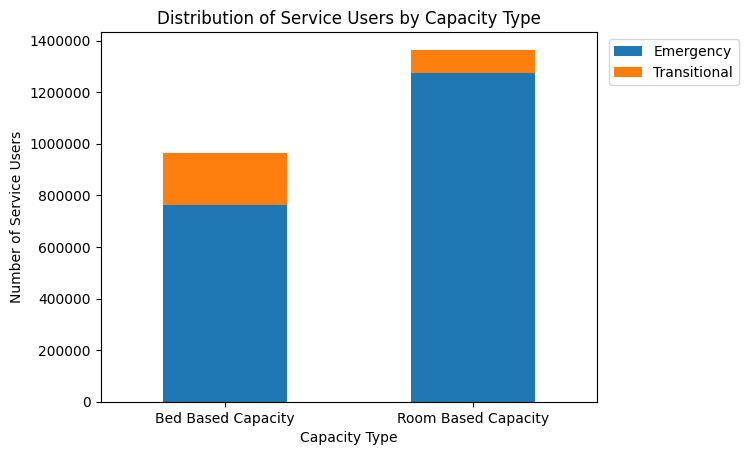

In [27]:
#Visualize the distribution of service users by program model in a stacked bar chart
users_by_cap_type.plot(kind='bar', stacked=True)

#set plot title
plt.title('Distribution of Service Users by Capacity Type')

#rotate the names of the program models, in order to display them horizontally
plt.xticks(rotation = 360) #(reference 1)

#set x-axis label
plt.xlabel('Capacity Type')
#set y-axis label
plt.ylabel('Number of Service Users')

#rename the labels in the legend and move the legend outside the graph
plt.legend(['Emergency', 'Transitional'], bbox_to_anchor = (1.30, 1)) #(reference 3)

#do not display the scale of the y-axis in scientific notation
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #(reference 2)

plt.show()

#References:
#How to Rotate X-Axis Tick Label Text in Matplotlib?: Rotate X-Axis Tick Label Text using plt.xticks(). (2022, September 30). GeeksforGeeks. https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/
#Kuecke. (2020). Re: How to remove scientific notation from a matplotlib bar plot? [Online forum comment]. Retrieved from Reddit: https://www.reddit.com/r/learnpython/comments/el4vbx/how_to_remove_scientific_notation_from_a/
#Matplotlib.pyplot.legend()in Python: Python Matplotlib.pyplot.legend() Syntax. (2024, January 10). GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/?ref=header_search

In [9]:
#filter the shelters dataset by capacity type (bed vs room) and save it as a dataframe
bed_data = shelters_data[shelters_data['CAPACITY_TYPE'] == 'Bed Based Capacity']
room_data = shelters_data[shelters_data['CAPACITY_TYPE'] == 'Room Based Capacity']

In [10]:
#find the sum of occupied beds by date and program model and save it as a dataframe
bed_by_date = bed_data.pivot_table(values = 'OCCUPIED_BEDS', index = 'OCCUPANCY_DATE', columns = 'PROGRAM_MODEL', aggfunc = 'sum')

#find the total capacity of beds by date and program model and save it as a dataframe
bed_cap_by_date = bed_data.pivot_table(values = 'CAPACITY_ACTUAL_BED', index = 'OCCUPANCY_DATE', columns = 'PROGRAM_MODEL', aggfunc = 'sum')

#find the bed occupancy rate (%) for emergency program by date and round it to two decimal places
bed_by_date['Emergency'] = round((bed_by_date['Emergency']/bed_cap_by_date['Emergency'])*100, 2)

#find the bed occupancy rate (%) for transitional program by date and round it to two decimal places
bed_by_date['Transitional'] = round((bed_by_date['Transitional']/bed_cap_by_date['Transitional'])*100, 2)

#display the bed occupancy rates for each program by date
bed_by_date

PROGRAM_MODEL,Emergency,Transitional
OCCUPANCY_DATE,,
2021-01-01,96.03,90.16
2021-01-02,96.16,90.00
2021-01-03,95.59,89.05
2021-01-04,95.58,90.22
2021-01-05,95.16,90.21
...,...,...
2021-12-27,95.33,94.09
2021-12-28,95.11,94.25
2021-12-29,96.36,94.08


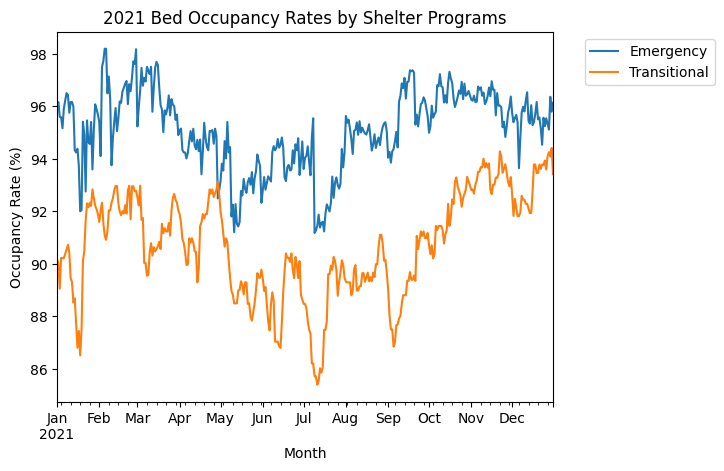

In [11]:
#visualize the occupancy rates for each program by date in a line chart
bed_by_date.plot()

#set plot title
plt.title('2021 Bed Occupancy Rates by Shelter Programs')

#set x-axis label
plt.xlabel('Month')

#set y-axis label
plt.ylabel('Occupancy Rate (%)')

#move the legend outside the graph
plt.legend(bbox_to_anchor = (1.05, 1))

plt.show()

In [12]:
#find the sum of occupied rooms by date and program model and save it as a dataframe
room_by_date = room_data.pivot_table(values = 'OCCUPIED_ROOMS', index = 'OCCUPANCY_DATE', columns = 'PROGRAM_MODEL', aggfunc = 'sum')

#find the total capacity of rooms by date and program model and save it as a dataframe
room_cap_by_date = room_data.pivot_table(values = 'CAPACITY_ACTUAL_ROOM', index = 'OCCUPANCY_DATE', columns = 'PROGRAM_MODEL', aggfunc = 'sum')

#find the room occupancy rate (%) for emergency program by date and round it to two decimal places
room_by_date['Emergency'] = round((room_by_date['Emergency']/room_cap_by_date['Emergency'])*100, 2)

#find the room occupancy rate (%) for transitional program by date and round it to two decimal places
room_by_date['Transitional'] = round((room_by_date['Transitional']/room_cap_by_date['Transitional'])*100, 2)

#display the room occupancy rates for each program by date
room_by_date

PROGRAM_MODEL,Emergency,Transitional
OCCUPANCY_DATE,,
2021-01-01,94.17,80.00
2021-01-02,94.49,80.00
2021-01-03,94.49,80.00
2021-01-04,94.23,80.00
2021-01-05,94.24,80.00
...,...,...
2021-12-27,98.35,100.00
2021-12-28,98.25,100.00
2021-12-29,98.31,98.84


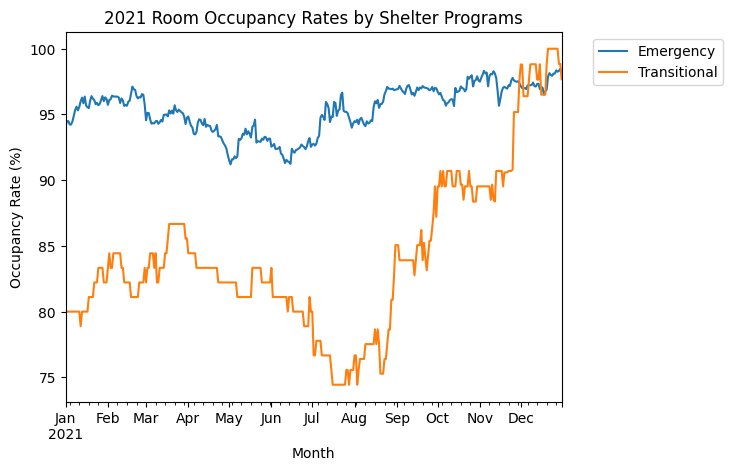

In [13]:
#visualize thr room occupancy rates for each program by dates in a line chart
room_by_date.plot()

#set plot title
plt.title('2021 Room Occupancy Rates by Shelter Programs')

#set x-axis label
plt.xlabel('Month')

#set y-axis label
plt.ylabel('Occupancy Rate (%)')

#move the legend outside the graph
plt.legend(bbox_to_anchor = (1.05, 1))

plt.show()

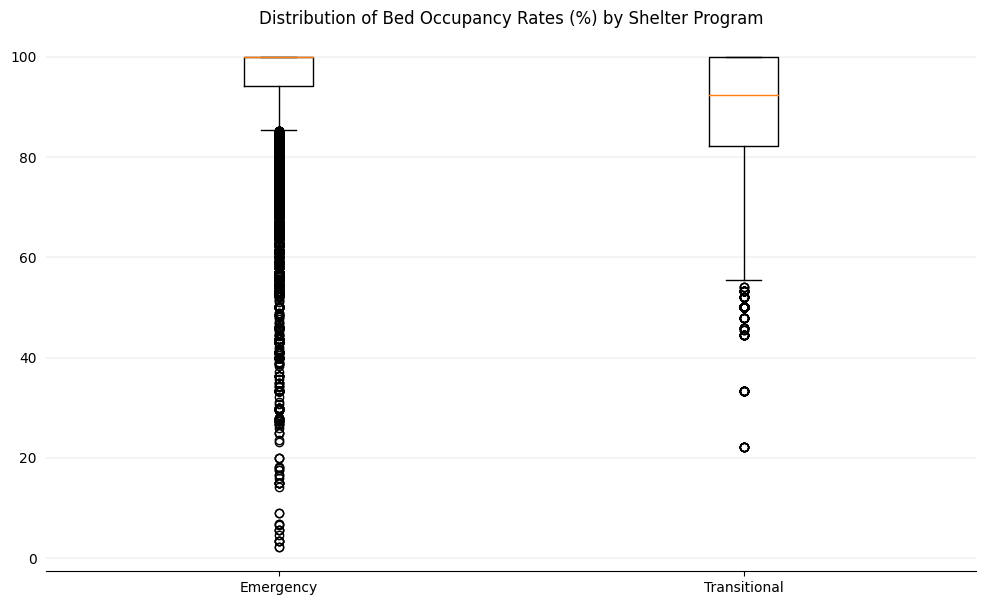

In [14]:
#filter the bed-based capacity dataset by program model and save it as a dataframe
emerg_bed_data = bed_data[bed_data['PROGRAM_MODEL'] == 'Emergency']
trans_bed_data = bed_data[bed_data['PROGRAM_MODEL'] == 'Transitional']

#find the bed occupancy rate (%) for emergency program and round it to two decimal places
emerg_bed_occup_rate = round((emerg_bed_data['OCCUPIED_BEDS']/emerg_bed_data['CAPACITY_ACTUAL_BED'])*100, 2)

#find the bed occupancy rate (%) for transitional program and round it to two decimal places
trans_bed_occup_rate = round((trans_bed_data['OCCUPIED_BEDS']/trans_bed_data['CAPACITY_ACTUAL_BED'])*100, 2)

#visualize the distribution of bed occupancy rates for each program in the year of 2021 in a boxplot
fig, ax = plt.subplots(figsize=(12, 7))

#remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

#add major gridlines in the y-axis
ax.grid(color = 'grey', axis = 'y', linestyle = '-', linewidth = 0.25, alpha = 0.5)

#set plot title
ax.set_title('Distribution of Bed Occupancy Rates (%) by Shelter Program')

#use data about the bed occupancy rate from each program model
bed_occup_data = [emerg_bed_occup_rate, trans_bed_occup_rate]

#set program models as labels for the boxplot
labels = ['Emergency', 'Transitional']

ax.boxplot(bed_occup_data, labels=labels)
plt.show()

In [28]:
#define a function that takes in a list of values and prints summary statistics
def get_summary_stats(dataset):
    #find and round the mean to 2 decimal places
    mean = np.round(np.mean(dataset), 2)

    #find and round the minimum value to 2 decimal places
    min_value = np.round(dataset.min(), 2)

    #find and round the maximum value to 2 decimal places
    max_value = np.round(dataset.max(), 2)

    #find and round the 1st quartile to 2 decimal places
    quartile_1 = np.round(dataset.quantile(0.25), 2)

    #find and round the median to 2 decimal places
    median = np.round(np.median(dataset), 2)

    #find and round the 3rd quartile to 2 decimal places
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    #find and round the interquartile range to 2 decimal places
    iqr = np.round(quartile_3 - quartile_1, 2)

    #print summary statistics
    print('Mean: %s' % mean)
    print('Min: %s' % min_value)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [31]:
#call function get_summary_stats to get the summary statistics of bed-based emergency program occupancy rates
print('Summary Statistics of Bed-based Emergency Program Occupancy Rates')
get_summary_stats(emerg_bed_occup_rate)

Summary Statistics of Bed-based Emergency Program Occupancy Rates
Mean: 94.35
Min: 2.27
Max: 100.0
25th percentile: 94.12
Median: 100.0
75th percentile: 100.0
Interquartile range (IQR): 5.88


In [32]:
#call function get_summary_stats to get the summary statistics of bed-based transitional program occupancy rates
print('Summary Statistics of Bed-based Transitional Program Occupancy Rates')
get_summary_stats(trans_bed_occup_rate)

Summary Statistics of Bed-based Transitional Program Occupancy Rates
Mean: 88.52
Min: 22.22
Max: 100.0
25th percentile: 82.14
Median: 92.31
75th percentile: 100.0
Interquartile range (IQR): 17.86


In [18]:
#conduct Welch t-test to compare the means of bed occupacy rates between two different shelter programs (emergency vs transitional)
t_stat, p_val = stats.ttest_ind(emerg_bed_occup_rate, trans_bed_occup_rate, equal_var = False)
#print the t-statistic and p-value
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 36.785295073621995
p-value = 7.163251251801676e-283


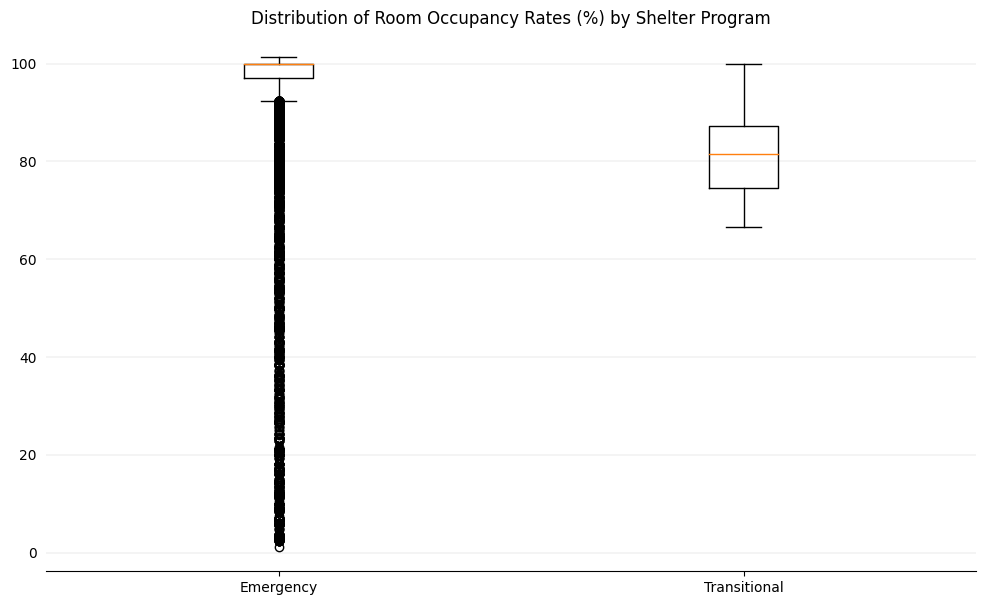

In [19]:
#filter the room-based capacity dataset by program model and save it as a dataframe
emerg_room_data = room_data[room_data['PROGRAM_MODEL'] == 'Emergency']
trans_room_data = room_data[room_data['PROGRAM_MODEL'] == 'Transitional']

#find the room occupancy rate (%) for emergency program and round it to two decimal places
emerg_room_occup_rate = round((emerg_room_data['OCCUPIED_ROOMS']/emerg_room_data['CAPACITY_ACTUAL_ROOM'])*100, 2)

#find the room occupancy rate (%) for transitional program and round it to two decimal places
trans_room_occup_rate = round((trans_room_data['OCCUPIED_ROOMS']/trans_room_data['CAPACITY_ACTUAL_ROOM'])*100, 2)

#visualize the distribution of room occupancy rates for each program in the year of 2021 in a boxplot
fig, ax = plt.subplots(figsize=(12, 7))

#remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

#remove y-axis tick marks
ax.yaxis.set_ticks_position('none')

#add major gridlines in the y-axis
ax.grid(color = 'grey', axis = 'y', linestyle = '-', linewidth = 0.25, alpha = 0.5)

#set plot title
ax.set_title('Distribution of Room Occupancy Rates (%) by Shelter Program')

#use data about the room occupancy rate from each program model
room_occup_data = [emerg_room_occup_rate, trans_room_occup_rate]

#set program models as labels for the boxplot
labels = ['Emergency', 'Transitional']

ax.boxplot(room_occup_data, labels=labels)
plt.show()

In [34]:
#call function get_summary_stats to get the summary statistics of room-based emergency program occupancy rates
print('Summary Statistics of Room-based Emergency Program Occupancy Rates')
get_summary_stats(emerg_room_occup_rate)

Summary Statistics of Room-based Emergency Program Occupancy Rates
Mean: 93.86
Min: 1.2
Max: 101.41
25th percentile: 96.97
Median: 100.0
75th percentile: 100.0
Interquartile range (IQR): 3.03


In [21]:
#in the emerg_room_data dataframe, find the rows where the number of available rooms is smaller than the number of occupied rooms
emerg_room_data[emerg_room_data['CAPACITY_ACTUAL_ROOM'] < emerg_room_data['OCCUPIED_ROOMS']]

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
23013,2021-06-11,City of Toronto,15991,Roehampton Residence,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,137,Room Based Capacity,NaN,NaN,79.0,80.0
24536,2021-06-22,City of Toronto,15991,Roehampton Residence,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,115,Room Based Capacity,NaN,NaN,71.0,72.0
24675,2021-06-23,City of Toronto,15991,Roehampton Residence,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,117,Room Based Capacity,NaN,NaN,73.0,74.0
24814,2021-06-24,City of Toronto,15991,Roehampton Residence,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,111,Room Based Capacity,NaN,NaN,71.0,72.0


In [33]:
#call function get_summary_stats to get the summary statistics of room-based transitional program occupancy rates
print('Summary Statistics of Room-based Transitional Program Occupancy Rates')
get_summary_stats(trans_room_occup_rate)

Summary Statistics of Room-based Transitional Program Occupancy Rates
Mean: 82.32
Min: 66.67
Max: 100.0
25th percentile: 74.6
Median: 81.48
75th percentile: 87.3
Interquartile range (IQR): 12.7


In [23]:
#conduct Welch t-test to compare the means of room occupacy rates between two different shelter programs (emergency vs transitional)
t_stat, p_val = stats.ttest_ind(emerg_room_occup_rate, trans_room_occup_rate, equal_var = False)
#print the t-statistic and p-value
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 31.70992269942313
p-value = 4.4899366989508746e-150
